**updated**

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history_sgd = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 44s 92ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0251 - val_accuracy: 0.9934
Epoch 2/5
469/469 [==============================] - 44s 95ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0250 - val_accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0249 - val_accuracy: 0.9930
Epoch 4/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0248 - val_accuracy: 0.9933
Epoch 5/5
469/469 [==============================] - 41s 86ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0248 - val_accuracy: 0.9931


In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history_adam = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 2/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0301 - val_accuracy: 0.9922
Epoch 3/5
469/469 [==============================] - 41s 86ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 4/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.0298 - val_accuracy: 0.9920
Epoch 5/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0352 - val_accuracy: 0.9918


In [28]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history_rmsprop = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0400 - val_accuracy: 0.9921
Epoch 2/5
469/469 [==============================] - 41s 87ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0379 - val_accuracy: 0.9928
Epoch 3/5
469/469 [==============================] - 43s 91ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0408 - val_accuracy: 0.9926
Epoch 4/5
469/469 [==============================] - 41s 87ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0391 - val_accuracy: 0.9930
Epoch 5/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0401 - val_accuracy: 0.9926


In [32]:
sgd_training_acc = history_sgd.history['accuracy']
sgd_val_acc = history_sgd.history['val_accuracy']
sgd_loss =history_sgd.history['loss']

adam_training_acc = history_adam.history['accuracy']
adam_val_acc = history_adam.history['val_accuracy']
adam_loss =history_adam.history['loss']

rmsprop_training_acc = history_rmsprop.history['accuracy']
rmsprop_val_acc = history_rmsprop.history['val_accuracy']
rmsprop_loss =history_rmsprop.history['loss']

Text(0.5, 0, 'RMSProp Validation Accuracy')

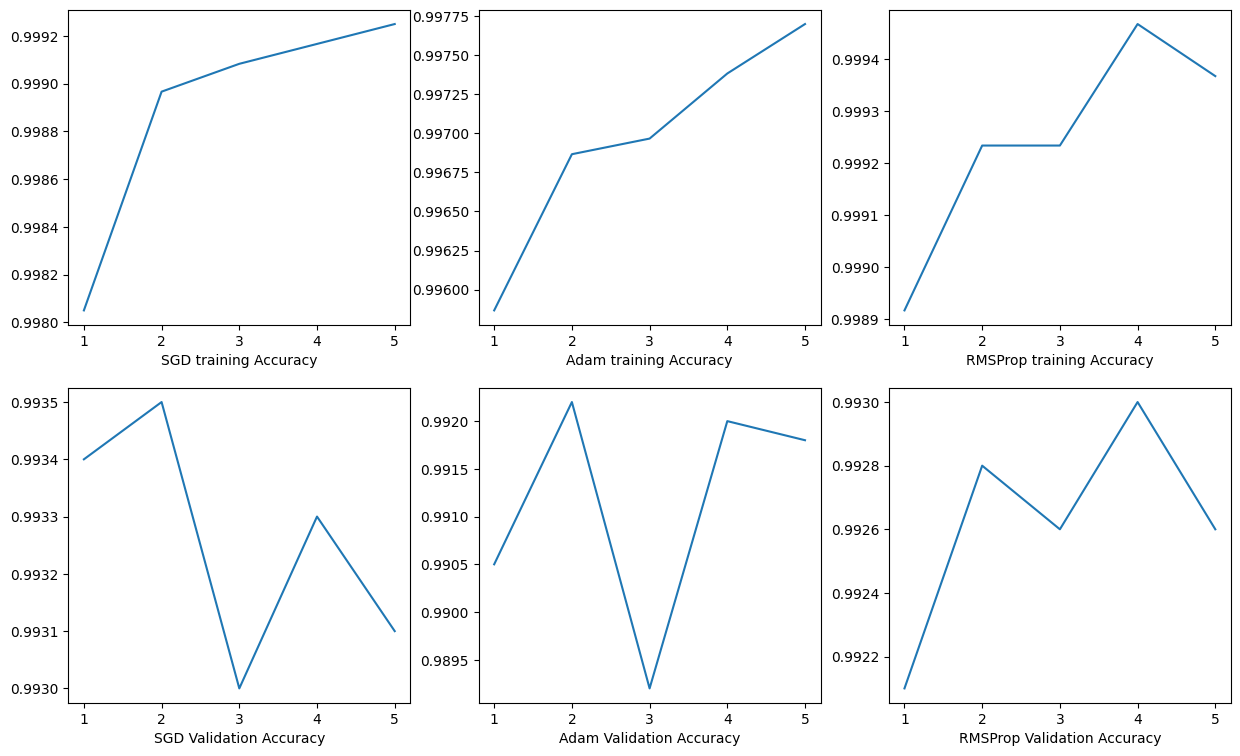

In [33]:
list = [1,2,3,4,5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

axes[0, 0].plot(list, sgd_training_acc, label='SGD training Accuracy')
axes[0, 0].set_xlabel('SGD training Accuracy')
axes[1, 0].plot(list, sgd_val_acc, label='SGD Validation Accuracy')
axes[1, 0].set_xlabel('SGD Validation Accuracy')


axes[0, 1].plot(list, adam_training_acc, label='Adam training Accuracy')
axes[0, 1].set_xlabel('Adam training Accuracy')
axes[1, 1].plot(list, adam_val_acc, label='SGD Validation Accuracy')
axes[1, 1].set_xlabel('Adam Validation Accuracy')


axes[0, 2].plot(list, rmsprop_training_acc, label='RMSProp training Accuracy')
axes[0, 2].set_xlabel('RMSProp training Accuracy')
axes[1, 2].plot(list, rmsprop_val_acc, label='RMSProp Validation Accuracy')
axes[1, 2].set_xlabel('RMSProp Validation Accuracy')

Text(0.5, 1.0, 'RmsProp LOSS')

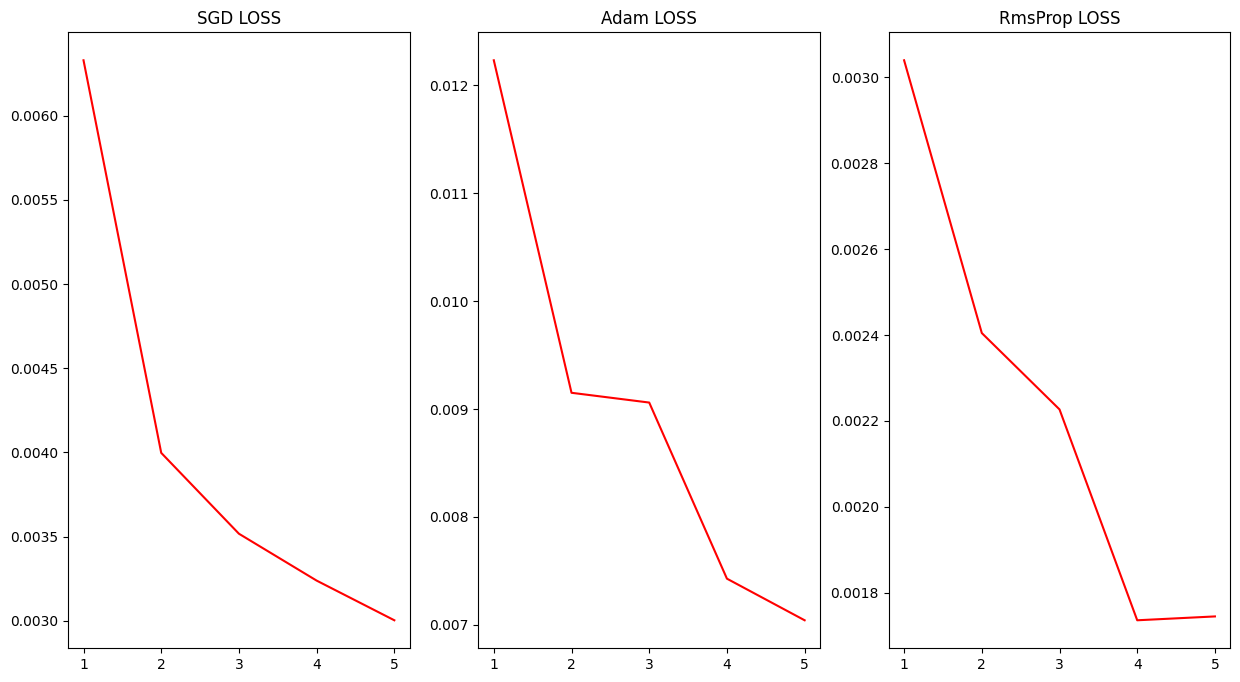

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

ax1.plot(list, sgd_loss, color='r')
ax1.set_title('SGD LOSS')

ax2.plot(list, adam_loss, color='r')
ax2.set_title('Adam LOSS')

ax3.plot(list, rmsprop_loss, color='r')
ax3.set_title('RmsProp LOSS')